# Travelling Salesman Problem (TSP)

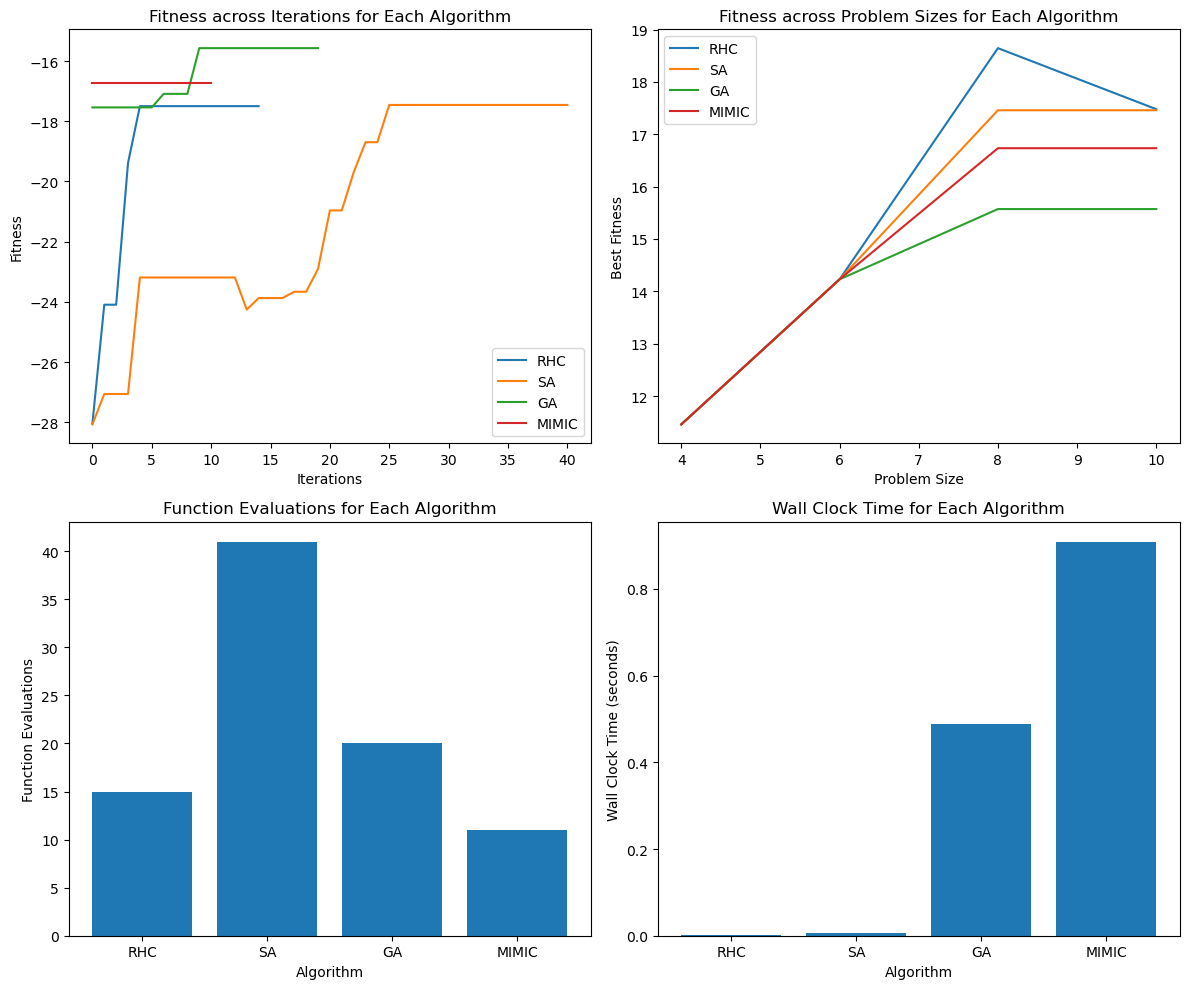

In [5]:
import matplotlib.pyplot as plt
import mlrose
import numpy as np
import time

# Set the seed for reproducibility
np.random.seed(42)

# Define the coordinates for the cities
coords_list = [(1, 3), (5, 2), (5, 2), (6, 4), (4, 2), (6, 6), (1, 5), (2, 3)]

# Create the fitness function for TSP
fitness_coords = mlrose.TravellingSales(coords=coords_list)

# Create problem object
problem = mlrose.TSPOpt(length=8, fitness_fn=fitness_coords, maximize=False)

algorithms = ["RHC", "SA", "GA", "MIMIC"]
results = {}

for algo in algorithms:
    start_time = time.time()
    if algo == "RHC":
        _, best_fitness, curve = mlrose.random_hill_climb(problem, curve=True, random_state=42)
    elif algo == "SA":
        _, best_fitness, curve = mlrose.simulated_annealing(problem, curve=True, random_state=42)
    elif algo == "GA":
        # Adjusted hyperparameters for GA
        _, best_fitness, curve = mlrose.genetic_alg(problem, curve=True, random_state=42)
    elif algo == "MIMIC":
        _, best_fitness, curve = mlrose.mimic(problem, curve=True, random_state=42)
    time_taken = time.time() - start_time
    
    results[algo] = {"Best Fitness": best_fitness, "Curve": curve, "Wall Clock Time": time_taken}


# 2. Fitness / Problem Size
problem_sizes = [4, 6, 8, 10]  
fitness_results = {algo: [] for algo in algorithms}

for size in problem_sizes:
    coords = coords_list[:size]
    fitness_coords = mlrose.TravellingSales(coords=coords)
    problem = mlrose.TSPOpt(length=len(coords), fitness_fn=fitness_coords, maximize=False)  # Use len(coords) instead of size
    init_state = np.arange(len(coords))  # Generate an initial state based on coords length
    np.random.shuffle(init_state)  # Shuffle to make it random
    
    
    for algo in algorithms:
        if algo == "GA":
            _, best_fitness, curve = mlrose.genetic_alg(problem, mutation_prob=0.2, pop_size=300, curve=True, random_state=42)
        elif algo == "SA":
            best_state, best_fitness = mlrose.simulated_annealing(problem, random_state=42)
        elif algo == "RHC":
            best_state, best_fitness = mlrose.random_hill_climb(problem, init_state=init_state, random_state=42)
        elif algo == "MIMIC":
            best_state, best_fitness = mlrose.mimic(problem, random_state=42)
        fitness_results[algo].append(best_fitness)

#plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# 1. Fitness / Iteration
for algo in algorithms:
    axs[0, 0].plot(results[algo]["Curve"], label=algo)
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Fitness')
axs[0, 0].set_title('Fitness across Iterations for Each Algorithm')
axs[0, 0].legend()

# 2. Fitness / Problem Size
for algo in algorithms:
    axs[0, 1].plot(problem_sizes, fitness_results[algo], label=algo)
axs[0, 1].set_xlabel('Problem Size')
axs[0, 1].set_ylabel('Best Fitness')
axs[0, 1].set_title('Fitness across Problem Sizes for Each Algorithm')
axs[0, 1].legend()

# 3. Function Evaluations
fevals = [len(results[algo]["Curve"]) for algo in algorithms]
axs[1, 0].bar(algorithms, fevals)
axs[1, 0].set_xlabel('Algorithm')
axs[1, 0].set_ylabel('Function Evaluations')
axs[1, 0].set_title('Function Evaluations for Each Algorithm')

# 4. Wall Clock Time
times = [results[algo]["Wall Clock Time"] for algo in algorithms]
axs[1, 1].bar(algorithms, times)
axs[1, 1].set_xlabel('Algorithm')
axs[1, 1].set_ylabel('Wall Clock Time (seconds)')
axs[1, 1].set_title('Wall Clock Time for Each Algorithm')

plt.tight_layout()
plt.savefig(r"D:\OMSCS\Machine learning_Fall_2023\comparison_plots.png", dpi=300)

plt.show()


In [6]:
fitness_results

{'RHC': [11.458193116710234,
  14.22929753251347,
  18.64455688890349,
  17.478708664619074],
 'SA': [11.458193116710234,
  14.22929753251347,
  17.458193116710234,
  17.458193116710234],
 'GA': [11.458193116710234,
  14.22929753251347,
  15.571155468592364,
  15.571155468592364],
 'MIMIC': [11.458193116710234,
  14.22929753251347,
  16.733433128760744,
  16.733433128760744]}

# Knapsack Problem

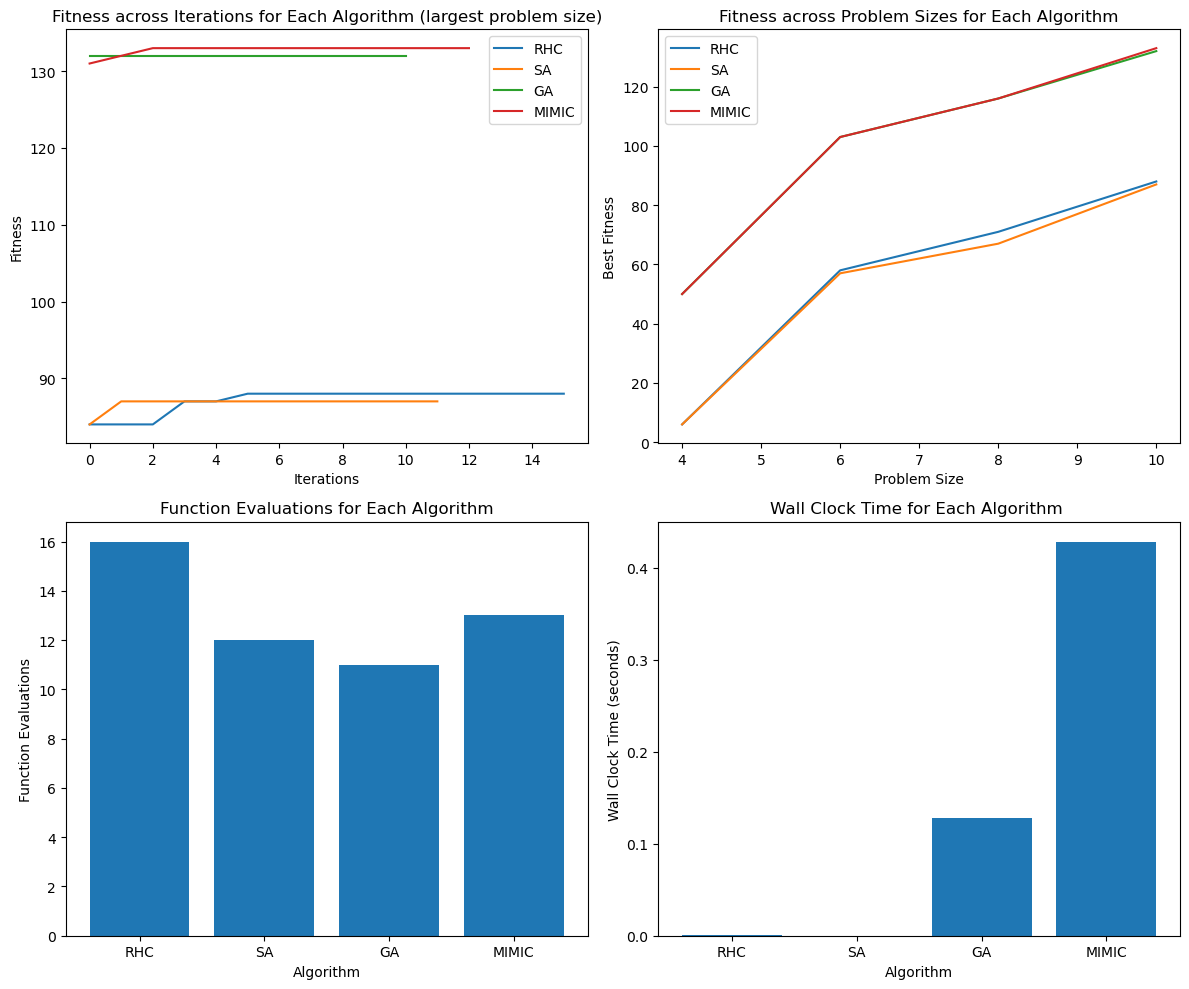

In [1]:
import matplotlib.pyplot as plt
import mlrose
import numpy as np
import time



# Define the list of algorithms
algorithms = ["RHC", "SA", "GA", "MIMIC"]


# # Define weights and values for the items
weights = [10, 11, 12, 50, 51, 52, 2, 3, 4, 5]
values = [1, 2, 3, 50, 51, 52, 6, 7, 8, 9]
max_weight_pct = 0.6

# Define problem sizes
problem_sizes = [4, 6, 8, 10]

# Initialize fitness results and wall clock times
fitness_results = {algo: [] for algo in algorithms}
wall_clock_times = {algo: [] for algo in algorithms}
curve_results = {algo: [] for algo in algorithms}

for size in problem_sizes:
    curr_weights = weights[:size]
    curr_values = values[:size]
    
    fitness = mlrose.Knapsack(curr_weights, curr_values, max_weight_pct)
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
    
    for algo in algorithms:
        start_time = time.time()
        if algo == "GA":
            _, best_fitness, curve = mlrose.genetic_alg(problem, curve=True, random_state=41)
        elif algo == "SA":
            _, best_fitness, curve = mlrose.simulated_annealing(problem, curve=True, random_state=41)
        elif algo == "RHC":
            _, best_fitness, curve = mlrose.random_hill_climb(problem, curve=True, random_state=41)
        elif algo == "MIMIC":
            _, best_fitness, curve = mlrose.mimic(problem, curve=True, random_state=41)
        time_taken = time.time() - start_time
        
        fitness_results[algo].append(best_fitness)
        wall_clock_times[algo].append(time_taken)
        curve_results[algo].append(curve)



# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Fitness / Iteration for the largest problem size
for algo in algorithms:
    axs[0, 0].plot(curve_results[algo][-1], label=algo)
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Fitness')
axs[0, 0].set_title('Fitness across Iterations for Each Algorithm (largest problem size)')
axs[0, 0].legend()

# 2. Fitness / Problem Size
for algo in algorithms:
    axs[0, 1].plot(problem_sizes, fitness_results[algo], label=algo)
axs[0, 1].set_xlabel('Problem Size')
axs[0, 1].set_ylabel('Best Fitness')
axs[0, 1].set_title('Fitness across Problem Sizes for Each Algorithm')
axs[0, 1].legend()

# 3. Function Evaluations for the largest problem size
fevals = [len(curve_results[algo][-1]) for algo in algorithms]
axs[1, 0].bar(algorithms, fevals)
axs[1, 0].set_xlabel('Algorithm')
axs[1, 0].set_ylabel('Function Evaluations')
axs[1, 0].set_title('Function Evaluations for Each Algorithm')

# 4. Wall Clock Time for the largest problem size
times = [wall_clock_times[algo][-1] for algo in algorithms]
axs[1, 1].bar(algorithms, times)
axs[1, 1].set_xlabel('Algorithm')
axs[1, 1].set_ylabel('Wall Clock Time (seconds)')
axs[1, 1].set_title('Wall Clock Time for Each Algorithm ')

plt.tight_layout()
plt.show()


In [2]:
fitness_results

{'RHC': [6.0, 58.0, 71.0, 88.0],
 'SA': [6.0, 57.0, 67.0, 87.0],
 'GA': [50.0, 103.0, 116.0, 132.0],
 'MIMIC': [50.0, 103.0, 116.0, 133.0]}

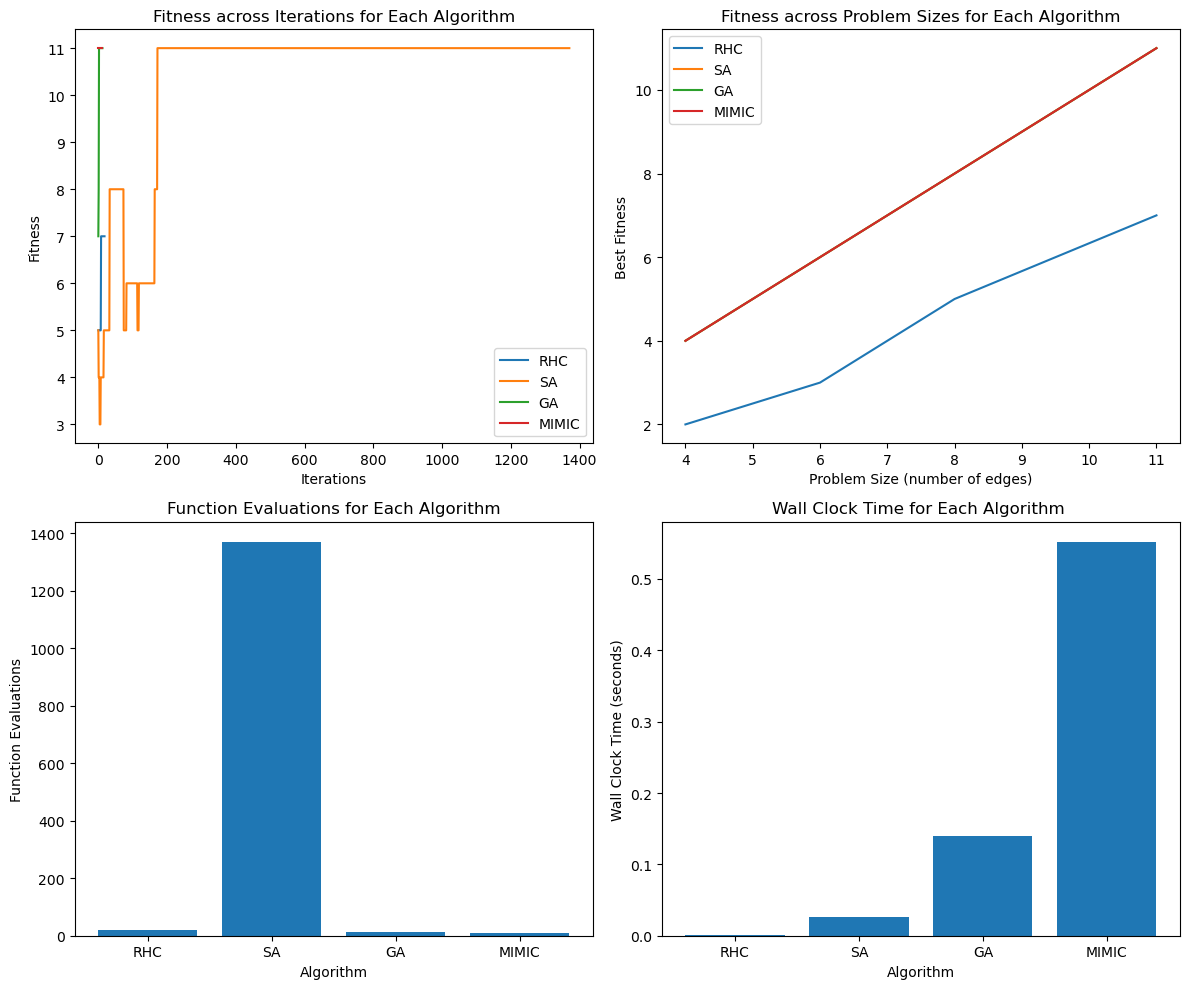

In [31]:
import matplotlib.pyplot as plt
import mlrose
import numpy as np
import time
from mlrose import ExpDecay

# Define the list of algorithms
algorithms = ["RHC", "SA", "GA", "MIMIC"]

# Define edges of graphs for different problem sizes
graphs = [
    [(0, 1), (1, 2), (2, 3), (3, 0)],
    [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2), (1, 3)],
    [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (0, 2), (1, 3), (2, 8)],
    [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (0, 2), (1, 3), (2, 4), (3, 5), (4, 0)]
]


# Initialize fitness results and wall clock times
fitness_results = {algo: [] for algo in algorithms}
wall_clock_times = {algo: [] for algo in algorithms}
curve_results = {algo: [] for algo in algorithms}

for graph in graphs:
    # Use the Max K Color fitness function and define the optimization problem
    fitness = mlrose.MaxKColor(graph)
    problem = mlrose.DiscreteOpt(length=len(graph) + 1, fitness_fn=fitness, maximize=True, max_val=4)
    
    for algo in algorithms:
        start_time = time.time()
        if algo == "GA":
            _, best_fitness, curve = mlrose.genetic_alg(problem, curve=True, random_state=45)
        if algo == "SA":
            schedule = ExpDecay()  # Using an exponential decay schedule
            _, best_fitness, curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True, random_state=45)
        elif algo == "RHC":
            _, best_fitness, curve = mlrose.random_hill_climb(problem, curve=True, random_state=45)
        elif algo == "MIMIC":
            _, best_fitness, curve = mlrose.mimic(problem, curve=True, random_state=45)
        time_taken = time.time() - start_time
        
        fitness_results[algo].append(best_fitness)
        wall_clock_times[algo].append(time_taken)
        curve_results[algo].append(curve)


# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Fitness / Iteration for the largest problem size
for algo in algorithms:
    axs[0, 0].plot(curve_results[algo][-1], label=algo)
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Fitness')
axs[0, 0].set_title('Fitness across Iterations for Each Algorithm')
axs[0, 0].legend()

# 2. Fitness / Problem Size
problem_sizes = [len(graph) for graph in graphs]
for algo in algorithms:
    axs[0, 1].plot(problem_sizes, fitness_results[algo], label=algo)
axs[0, 1].set_xlabel('Problem Size (number of edges)')
axs[0, 1].set_ylabel('Best Fitness')
axs[0, 1].set_title('Fitness across Problem Sizes for Each Algorithm')
axs[0, 1].legend()

# 3. Function Evaluations for the largest problem size
fevals = [len(curve_results[algo][-1]) for algo in algorithms]
axs[1, 0].bar(algorithms, fevals)
axs[1, 0].set_xlabel('Algorithm')
axs[1, 0].set_ylabel('Function Evaluations')
axs[1, 0].set_title('Function Evaluations for Each Algorithm')

# 4. Wall Clock Time for the largest problem size
times = [wall_clock_times[algo][-1] for algo in algorithms]
axs[1, 1].bar(algorithms, times)
axs[1, 1].set_xlabel('Algorithm')
axs[1, 1].set_ylabel('Wall Clock Time (seconds)')
axs[1, 1].set_title('Wall Clock Time for Each Algorithm ')

plt.tight_layout()
plt.show()


In [24]:
fitness_results 

{'RHC': [1.0, 3.0, 3.0, 4.0],
 'SA': [4.0, 6.0, 8.0, 11.0],
 'GA': [4.0, 6.0, 8.0, 11.0],
 'MIMIC': [4.0, 6.0, 8.0, 11.0]}